# Imports

In [181]:
import pandas as pd
import pandas_datareader as web
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.optimize as sco

# Pulling the Stock Data

In [182]:
symbols = ['MSFT', 'AMZN', 'AAPL', 'GOOGL', 'FB', 'NVDA', 'MCD', 'NFLX', 'PYPL', 'SQ', 
           'TSLA', 'AU', 'GOLD', 'CEY.L', 'SGLN.L', 'PAAS', 'POLY.L', 'VWRL.L', 'VFEM.L', 
           'VUSA.L', 'PHSP.L', 'AUY', 'BTG', 'KGC']
start_date = datetime(2019, 11, 8)
end_date = datetime(2020, 11, 7)
my_stocks = web.get_data_yahoo(symbols, start_date, end_date)
my_stocks

Attributes   Adj Close               ...     Volume            
Symbols           MSFT         AMZN  ...        BTG         KGC
Date                                 ...                       
2019-11-08  144.317017  1785.880005  ...  7031700.0  13322600.0
2019-11-11  144.465332  1771.650024  ...  7583800.0  11681800.0
2019-11-12  145.414520  1778.000000  ...  6582800.0  19625500.0
2019-11-13  145.651825  1753.109985  ...  6179700.0  15885700.0
2019-11-14  146.393372  1754.599976  ...  4966300.0  16054400.0
...                ...          ...  ...        ...         ...
2020-11-02  202.330002  3004.479980  ...  6110000.0   9373000.0
2020-11-03  206.429993  3048.409912  ...  6640800.0  10367900.0
2020-11-04  216.389999  3241.159912  ...  8219000.0   9699800.0
2020-11-05  223.289993  3322.000000  ...  9312700.0  17128800.0
2020-11-06  223.720001  3311.370117  ...  5564700.0   9771200.0

[257 rows x 144 columns]

In [183]:
adj_price_of_portfolio = my_stocks['Adj Close']
adj_price_of_portfolio.head()

Symbols           MSFT         AMZN       AAPL  ...       AUY       BTG       KGC
Date                                            ...                              
2019-11-08  144.317017  1785.880005  63.954544  ...  3.226999  3.379984  4.155538
2019-11-11  144.465332  1771.650024  64.460991  ...  3.207262  3.340682  4.115676
2019-11-12  145.414520  1778.000000  64.401978  ...  3.296079  3.419286  4.275121
2019-11-13  145.651825  1753.109985  65.019051  ...  3.365159  3.429112  4.255191
2019-11-14  146.393372  1754.599976  64.569160  ...  3.424370  3.468414  4.255191

[5 rows x 24 columns]

# Mean and Variance Graphs

In [184]:
COLOR = 'white'
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

In [185]:
daily_returns = adj_price_of_portfolio.pct_change()
mean_daily_returns = daily_returns.mean()
plt.title('Mean Daily RoR for Stocks - July 2017 to October 2020', fontdict={'color':'white'})
mean_daily_returns.plot(figsize=(20,10), kind='bar', ylabel='Mean Daily RoR');

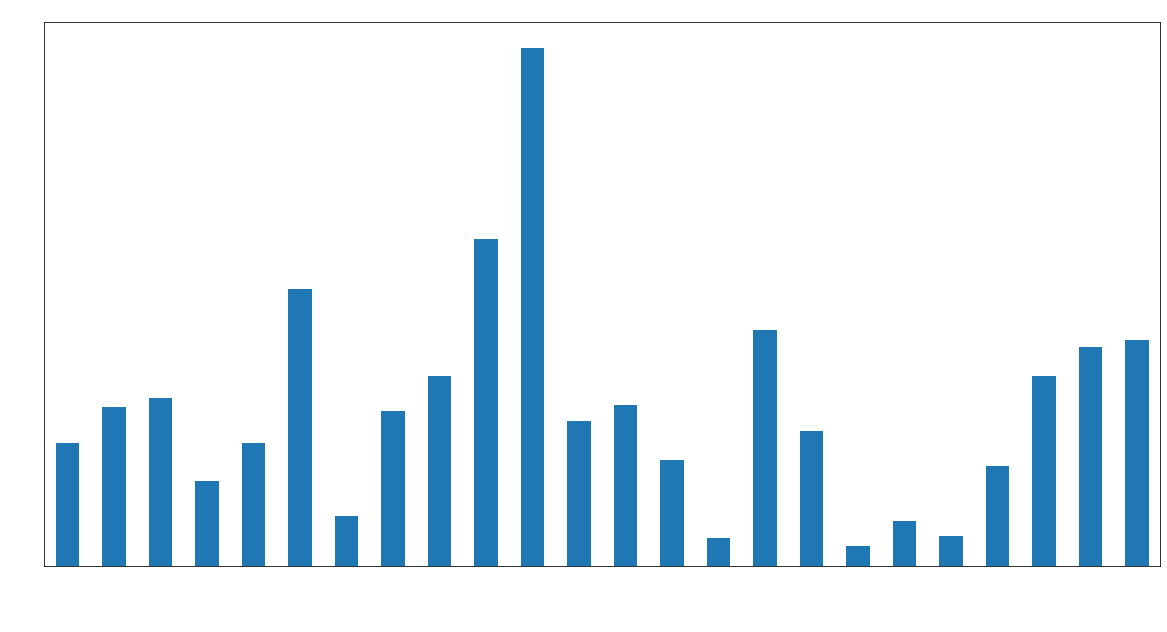

In [186]:
number_of_days = (end_date - start_date).days
returns_since_start = mean_daily_returns * number_of_days

plt.title('%age Total Return for Stocks - July 2017 to October 2020', fontdict={'color':'white'})
returns_since_start.plot(kind='bar', figsize=(20,10), ylabel='%age Return');

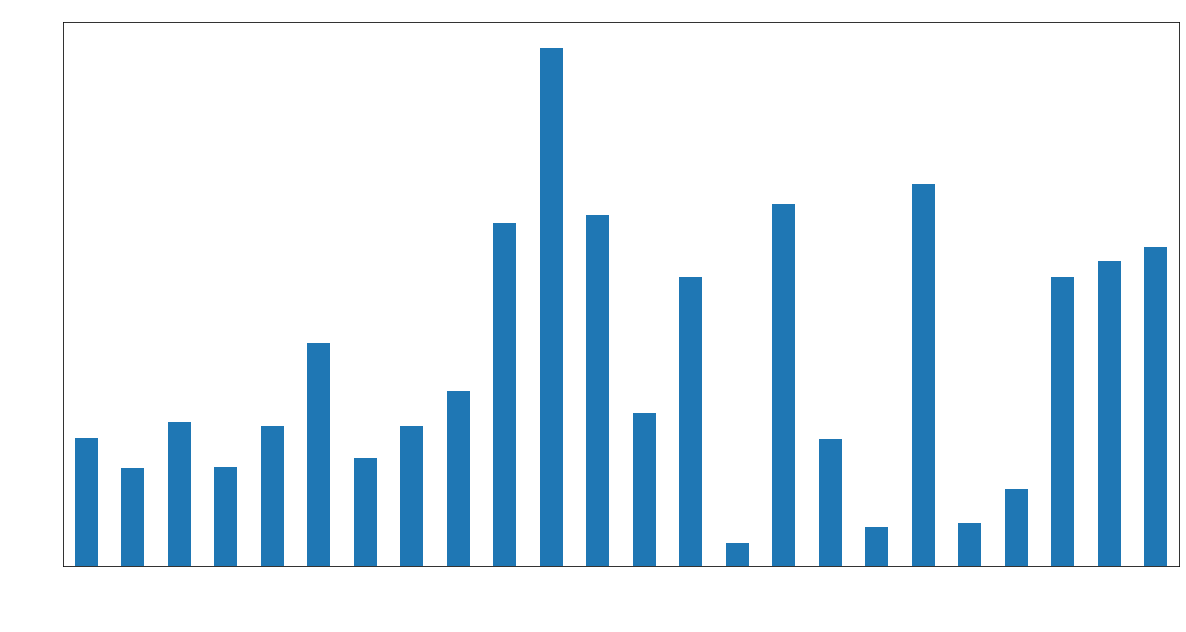

In [187]:
daily_variance_of_stocks = daily_returns.var()
plt.title('Mean Daily Variance for Stocks - July 2017 to October 2020', fontdict={'color':'white'})
daily_variance_of_stocks.plot(kind='bar', figsize=(20,10), ylabel='Daily Variance');

# Efficient Frontier Calculation

Normalised returns:

In [188]:
log_ret = np.log(adj_price_of_portfolio / adj_price_of_portfolio.shift(1))
log_ret.head()

Symbols         MSFT      AMZN      AAPL  ...       AUY       BTG       KGC
Date                                      ...                              
2019-11-08       NaN       NaN       NaN  ...       NaN       NaN       NaN
2019-11-11  0.001027 -0.008000  0.007888  ... -0.006135 -0.011696 -0.009639
2019-11-12  0.006549  0.003578 -0.000916  ...  0.027316  0.023257  0.038009
2019-11-13  0.001631 -0.014098  0.009536  ...  0.020742  0.002869 -0.004673
2019-11-14  0.005078  0.000850 -0.006943  ...  0.017442  0.011396  0.000000

[5 rows x 24 columns]

In [189]:
np.random.seed(42)
num_portfolios = 25000
all_weights = np.zeros((num_portfolios, len(adj_price_of_portfolio.columns)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for x in range(num_portfolios):
    # Weights
    weights = np.array(np.random.random(len(symbols)))
    weights = weights / np.sum(weights)

    # Save weights
    all_weights[x,:] = weights

    # Expected return
    ret_arr[x] = np.sum((log_ret.mean() * weights * 252))

    # Expected volitility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe ratio
    sharpe_arr[x] = ret_arr[x] / vol_arr[x]


In [190]:
print("The max Sharpe ratio is:", sharpe_arr.max())
print("Its location in the array:", sharpe_arr.argmax())

The max Sharpe ratio is: 1.953157540676265
Its location in the array: 24308


Get all the allocations for this max:

In [191]:
print(all_weights[sharpe_arr.argmax(),:])

max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

[0.04797228 0.04227866 0.0863389  0.019688   0.00697058 0.054139
 0.01277319 0.06652244 0.03349313 0.08545627 0.08816278 0.00804969
 0.02868425 0.00210845 0.0307233  0.00849411 0.08338148 0.04028012
 0.01987493 0.00904804 0.0506316  0.09151591 0.01209321 0.07131966]


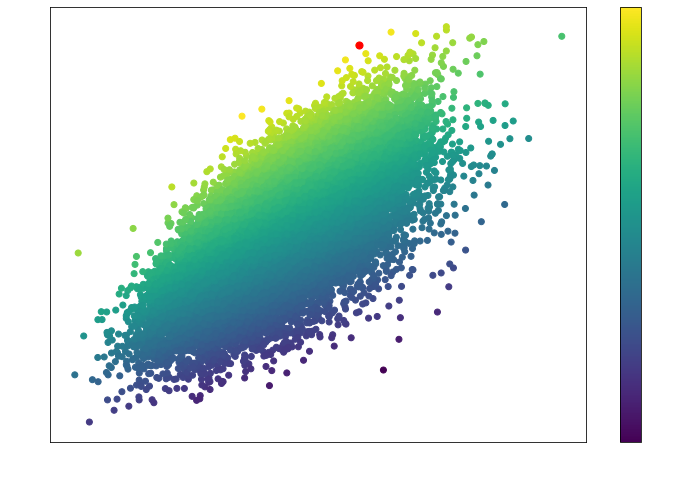

In [192]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volitility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50); # Red dot


In [193]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

Moving on, we will need to create a variable to include our constraints like the check_sum. We’ll also define an initial guess and specific bounds, to help the minimization be faster and more efficient. Our initial guess will be equal for each stock (or 1/24), and the bounds will be a tuple (0,1) for each stock, since the weight can range from 0 to 1.

In [194]:
cons = ({'type': 'eq', 'fun': check_sum})
bounds = [(0,1) for x in range(len(symbols))]
bounds = tuple(bounds)
equal_weight = 1 / len(symbols)
init_guess = [equal_weight for x in range(len(symbols))]

Enter the minimize function. I chose the method ‘SLSQP’ because it’s the method used for most of the generic minimization problems. In case you are wondering, it stands for Sequential Least Squares Programming. Make sure to pass the initial method, the bounds and the constraints with the variables defined above. If we print the variable it will look like this:

In [195]:
opt_results = sco.minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
print(opt_results)

     fun: -2.5017728787389504
     jac: array([ 8.43287796e-01,  1.14184618e-03,  1.88552916e-01,  8.86538655e-01,
        7.02303410e-01,  1.16342306e-03,  1.57644770e+00,  3.39668095e-01,
        2.04803646e-01, -4.30941582e-05,  1.18702650e-04,  1.24515614e+00,
        3.22766989e-01,  1.65828896e+00, -4.13954258e-04,  1.15082800e+00,
        1.85668498e-01,  9.03427899e-01,  1.22819358e+00,  8.52340043e-01,
       -1.19742751e-03,  7.74127334e-01,  6.08401269e-01,  1.46234274e-01])
 message: 'Optimization terminated successfully.'
    nfev: 423
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([1.90655052e-16, 1.46686162e-01, 0.00000000e+00, 0.00000000e+00,
       7.63080655e-17, 1.00748517e-01, 1.51256674e-15, 3.45701403e-17,
       5.67615366e-17, 2.16062445e-02, 2.33630306e-01, 0.00000000e+00,
       0.00000000e+00, 1.79804662e-16, 3.61020077e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.52829432e-17,
       1.36308694e-01, 0.00

We want the key x from the dictionary, which is an array with the weights of the portfolio that has the maximum Sharpe ratio. If we use our function get_ret_vol_sr we get the return, volatility, and sharpe ratio:

In [196]:
get_ret_vol_sr(opt_results.x)

array([0.80185032, 0.32051283, 2.50177288])

So we got a better Sharpe ratio than we got with the simulation we did before.

We’re now ready to check all optimal portfolios, which is basically our efficient frontier. The efficient frontier is the set of portfolios that gets us the highest expected return for any given risk level. Or from another perspective, the minimum amount of risk for an expected return. To trace this line, we can define a variable frontier_y. Going back to the chart above, we can see the maximum return doesn’t go much higher than 0.3, so frontier_y will be defined from 0 to 0.3.

In [201]:
frontier_y = np.linspace(0,0.7,200)

To finish the plotting of the frontier, we have define one last function that will help us minimize the volatility. It will return the volatility (index 1) of the given weights.

In [202]:
def minimise_volitility(weights):
    return get_ret_vol_sr(weights)[1]

And now the last bit of code to help us get get our x values for the efficient frontier. We use the same code as above with a few changes to the constraints. The for loop is basically going through every possible value in our previously defined frontier_y and obtaining the minimum result (which is the key ‘fun’) of volatility (our x axis in the chart).

In [203]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = sco.minimize(minimise_volitility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

Finally we can plot the actual efficient frontier by passing the variables frontier_x and frontier_y.

In [205]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3);

In [206]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    no_of_stocks = len(symbols)
    for i in range(num_portfolios):
        weights = np.random.random(no_of_stocks) #Needs to equal the number of stocks
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [207]:
risk_free_rate = .13 / 100
num_portfolios = 25000
cov_matrix = daily_returns.cov()

def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=adj_price_of_portfolio.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2) for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=adj_price_of_portfolio.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2) for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier', fontdict={'color':'white'})
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    return max_sharpe_allocation, min_vol_allocation

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.79
Annualised Volatility: 0.32


Symbols     MSFT  AMZN  AAPL  GOOGL    FB  ...  VUSA.L  PHSP.L   AUY   BTG   KGC
allocation   1.7  0.76   2.6   1.28  6.41  ...    7.37    9.17  1.29  3.05  6.82

[1 rows x 24 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.49
Annualised Volatility: 0.25


Symbols      MSFT  AMZN  AAPL  GOOGL    FB  ...  VUSA.L  PHSP.L   AUY   BTG   KGC
allocation  12.35  8.25  2.73    0.0  4.33  ...    9.43    3.61  2.48  0.06  5.06

[1 rows x 24 columns]


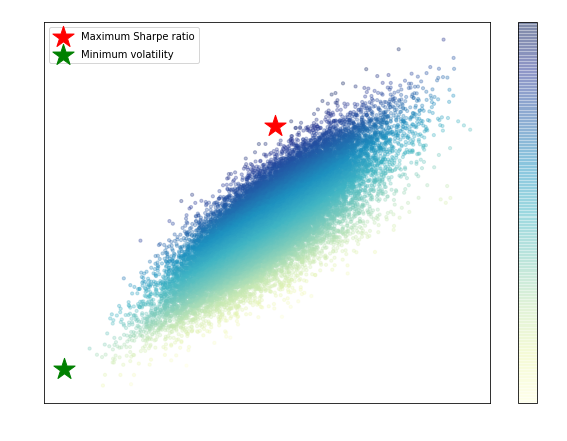

In [208]:
max_sharpe_alloc, min_vol_alloc = display_simulated_ef_with_random(mean_daily_returns, cov_matrix, num_portfolios, risk_free_rate)

Calculation for how much I would invest in each assest for a certain amount of cash:

**High Reward, High Risk:**

In [209]:
total_cash_invested = 1168.78

trans_max_sharpe = max_sharpe_alloc.T
trans_max_sharpe['Invest'] = trans_max_sharpe['allocation'] / 100 * total_cash_invested
trans_max_sharpe['Invest'] = trans_max_sharpe['Invest'].round(2)
trans_max_sharpe

allocation  Invest
Symbols                    
MSFT           1.70   19.87
AMZN           0.76    8.88
AAPL           2.60   30.39
GOOGL          1.28   14.96
FB             6.41   74.92
NVDA           3.50   40.91
MCD            1.65   19.28
NFLX           9.90  115.71
PYPL           1.35   15.78
SQ             8.48   99.11
TSLA           9.55  111.62
AU             3.52   41.14
GOLD           0.89   10.40
CEY.L          0.70    8.18
SGLN.L         3.72   43.48
PAAS           3.14   36.70
POLY.L         7.55   88.24
VWRL.L         1.04   12.16
VFEM.L         4.56   53.30
VUSA.L         7.37   86.14
PHSP.L         9.17  107.18
AUY            1.29   15.08
BTG            3.05   35.65
KGC            6.82   79.71

In [210]:
plt.figure(figsize=(20,10))
plt.bar(trans_max_sharpe.index, trans_max_sharpe['Invest']);

**Low Reward, Low Risk:**

In [211]:
trans_vol_alloc = min_vol_alloc.T
trans_vol_alloc['Invest'] = trans_vol_alloc['allocation'] / 100 * total_cash_invested
trans_vol_alloc['Invest'] = trans_vol_alloc['Invest'].round(2)
trans_vol_alloc

allocation  Invest
Symbols                    
MSFT          12.35  144.34
AMZN           8.25   96.42
AAPL           2.73   31.91
GOOGL          0.00    0.00
FB             4.33   50.61
NVDA           3.09   36.12
MCD            4.01   46.87
NFLX           4.61   53.88
PYPL           0.89   10.40
SQ             0.30    3.51
TSLA           1.31   15.31
AU             0.40    4.68
GOLD           5.92   69.19
CEY.L          4.18   48.86
SGLN.L        11.04  129.03
PAAS           0.44    5.14
POLY.L         4.19   48.97
VWRL.L         5.81   67.91
VFEM.L         5.50   64.28
VUSA.L         9.43  110.22
PHSP.L         3.61   42.19
AUY            2.48   28.99
BTG            0.06    0.70
KGC            5.06   59.14

In [212]:
plt.figure(figsize=(20,10))
plt.bar(trans_vol_alloc.index, trans_vol_alloc['Invest']);